In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train= pd.read_csv('./X_train_aggregated.csv',  index_col=0)
X_test= pd.read_csv('./X_test_aggregated.csv',  index_col=0)
y_train= pd.read_csv('./y_train_agg.csv')
y_test= pd.read_csv('./y_test_agg.csv')
X_test.fillna(0,inplace=True)

In [6]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

steps = [('rfc', RandomForestClassifier(n_estimators = 3, criterion = 'entropy', 
                                        random_state = 0,class_weight='balanced',
                                        min_samples_split=50,oob_score=True,
                                        max_features='log2',max_depth=50))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)  #criterion = 'gini'

In [89]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy

In [90]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8937153419593346


# Feature_importances

In [91]:
feat_labels = X_train.columns
importances = model.steps[0][1].feature_importances_
indices = np.argsort(importances)[::-1]
res=[]
for f in range(X_train.shape[1]):
    #print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    res.append([feat_labels[indices[f]], importances[indices[f]]])
df_importances=pd.DataFrame(res)
threshold = 0.055
list(df_importances[df_importances[1]>threshold ][0])# feature importance > threshold 

['MaxHospitalDays',
 'TotalIPAnnualReimbursementAmt',
 'TotalInscClaimAmtReimbursed',
 'ClaimCounts',
 'TotalIPAnnualDeductibleAmtdf']

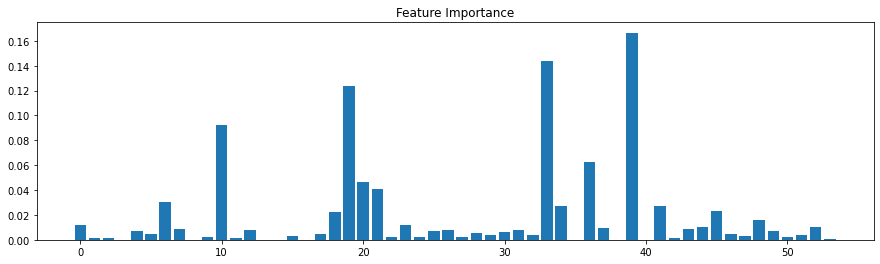

In [92]:
# plot feature importance
plt.figure(figsize=(15,4))
plt.bar([x for x in range(len(importances))], importances)
plt.title('Feature Importance')

plt.show()

# Confusion_matrix

In [93]:
confusion_matrix(y_test, y_test_pred)

array([[881,  98],
       [ 17,  86]])

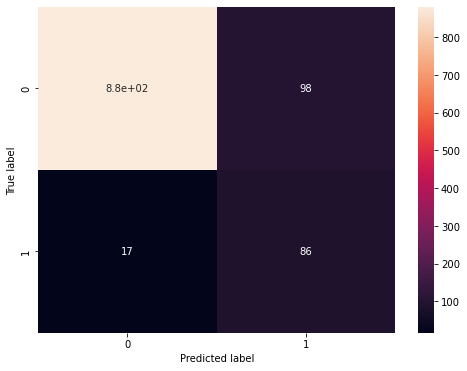

In [94]:

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Roc_Auc_Score

In [95]:
from sklearn.metrics import roc_auc_score
roc_auc_score_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])  
roc_auc_score_test  = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print('roc_auc_score for the train dataset: {:.2f}'.format(roc_auc_score_train))
print('roc_auc_score for the test dataset: {:.2f}'.format(roc_auc_score_test))

roc_auc_score for the train dataset: 0.98
roc_auc_score for the test dataset: 0.93


Text(0.5, 1.0, 'Test ROC Curve')

<Figure size 432x288 with 0 Axes>

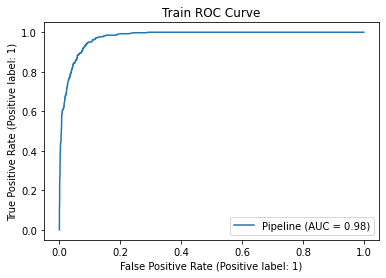

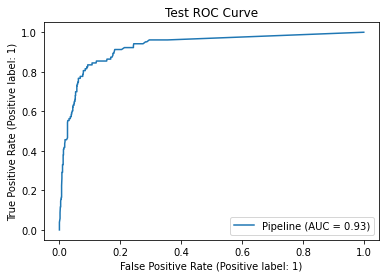

In [117]:
from sklearn.metrics import plot_roc_curve 

plt.figure(1).clf()

plot_roc_curve(model, X_train, y_train)

plt.title('Train ROC Curve')
plot_roc_curve(model, X_test, y_test)

plt.title('Test ROC Curve')

# PR_AUC

In [97]:
y_test_proba = model.predict_proba(X_test)
y_score = y_test_proba[:, 1]

PR-AUC is 0.63


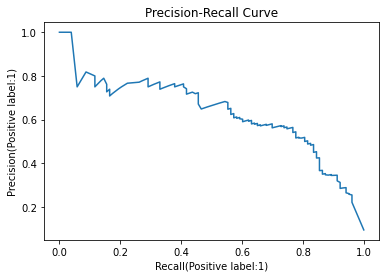

In [98]:
from sklearn.metrics import precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print('PR-AUC is {:.2f}'.format(auc_precision_recall))

# plot PR curve
plt.plot(recall, precision)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve')
plt.show()


# Classification_report

In [100]:
from sklearn.metrics import classification_report
print('---------------------Train Classification Report--------------------------------')
print(classification_report(y_train, y_train_pred))
print('---------------------Test Classification Report--------------------------------')
print(classification_report(y_test, y_test_pred))

---------------------Train Classification Report--------------------------------
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3925
           1       0.54      0.93      0.68       403

    accuracy                           0.92      4328
   macro avg       0.76      0.92      0.82      4328
weighted avg       0.95      0.92      0.93      4328

---------------------Test Classification Report--------------------------------
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       979
           1       0.47      0.83      0.60       103

    accuracy                           0.89      1082
   macro avg       0.72      0.87      0.77      1082
weighted avg       0.93      0.89      0.91      1082



In [120]:
from sklearn.tree import export_graphviz
estimator = model.steps[0][1].estimators_[1]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns ,
                class_names = ['Yes','No'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree3.png')